In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import pylab

The purpose of this notebook is to evaluate how the peak discharge changes throughout the 21st century in the Brahmaputra River.

### Import water data from each time period

#### 1976-2006

In [2]:
gfdl_qw_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/reference/HadGEM2/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/reference/NORESM-M/Hydrotrend/HYDROASCII.Q', skip_header = True)   

In [3]:
gfdl_qs_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/HadGEM2/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_ref = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/NORESM-M/Hydrotrend/HYDROASCII.QS', skip_header = True)   

### Reshape arrays: Mean Daily Discharge

In [4]:
gfdl_reshape = gfdl_qw_ref[0:-1].reshape(27, 365)
gfdl_mean_cols_qw = np.mean(gfdl_reshape, axis = 0)

hadgem_reshape = hadgem_qw_ref[0:-1].reshape(27, 365)
hadgem_mean_cols_qw = np.mean(hadgem_reshape, axis = 0)

ipsl_reshape = ipsl_qw_ref[0:-1].reshape(27, 365)
ipsl_mean_cols_qw = np.mean(ipsl_reshape, axis = 0)

miroc_reshape = miroc_qw_ref[0:-1].reshape(27, 365)
miroc_mean_cols_qw = np.mean(miroc_reshape, axis = 0)

noresm_reshape = noresm_qw_ref[0:-1].reshape(27, 365)
noresm_mean_cols_qw = np.mean(noresm_reshape, axis = 0)

### Reshape arrays: Mean Daily Sediment Discharge

In [5]:
gfdl_reshape_qs = gfdl_qs_ref[0:-1].reshape(30, 365)
gfdl_mean_cols_qs = np.mean(gfdl_reshape_qs, axis = 0)

hadgem_reshape_qs = hadgem_qs_ref[0:-1].reshape(30, 365)
hadgem_mean_cols_qs = np.mean(hadgem_reshape_qs, axis = 0)

ipsl_reshape_qs = ipsl_qs_ref[0:-1].reshape(30, 365)
ipsl_mean_cols_qs = np.mean(ipsl_reshape_qs, axis = 0)

miroc_reshape_qs = miroc_qs_ref[0:-1].reshape(30, 365)
miroc_mean_cols_qs = np.mean(miroc_reshape_qs, axis = 0)

noresm_reshape_qs = noresm_qs_ref[0:-1].reshape(30, 365)
noresm_mean_cols_qs = np.mean(noresm_reshape_qs, axis = 0)

### Reshape arrays: Mean Annual Discharge

In [6]:
gfdl_reshape_qw = gfdl_qw_ref[0:-1].reshape(27, 365)
gfdl_mean_rows_qw = np.mean(gfdl_reshape_qw, axis = 1)

hadgem_reshape_qw = hadgem_qw_ref[0:-1].reshape(27, 365)
hadgem_mean_rows_qw = np.mean(hadgem_reshape_qw, axis = 1)

ipsl_reshape_qw = ipsl_qw_ref[0:-1].reshape(27, 365)
ipsl_mean_rows_qw = np.mean(ipsl_reshape_qw, axis = 1)

miroc_reshape_qw = miroc_qw_ref[0:-1].reshape(27, 365)
miroc_mean_rows_qw = np.mean(miroc_reshape_qw, axis = 1)

noresm_reshape_qw = noresm_qw_ref[0:-1].reshape(27, 365)
noresm_mean_rows_qw = np.mean(noresm_reshape_qw, axis = 1)

### Reshape arrays: Mean Annual Sediment Discharge

In [7]:
gfdl_reshape_qs = gfdl_qs_ref[0:-1].reshape(30, 365)
gfdl_mean_rows_qs = np.mean(gfdl_reshape_qs, axis = 1)

hadgem_reshape_qs = hadgem_qs_ref[0:-1].reshape(30, 365)
hadgem_mean_rows_qs = np.mean(hadgem_reshape_qs, axis = 1)

ipsl_reshape_qs = ipsl_qs_ref[0:-1].reshape(30, 365)
ipsl_mean_rows_qs = np.mean(ipsl_reshape_qs, axis = 1)

miroc_reshape_qs = miroc_qs_ref[0:-1].reshape(30, 365)
miroc_mean_rows_qs = np.mean(miroc_reshape_qs, axis = 1)

noresm_reshape_qs = noresm_qs_ref[0:-1].reshape(30, 365)
noresm_mean_rows_qs = np.mean(noresm_reshape_qs, axis = 1)

Let's write a function to reshape the data for the remaining time periods

In [8]:
def reshape_cols(record):
    return np.mean(record[0:-1].reshape(30, 365), axis = 0)

def reshape_rows(record):
    return np.mean(record[0:-1].reshape(30,365), axis = 1)

#### 2006-2036

In [9]:
gfdl_qw_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)  

gfdl_qw_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/HadGEM2/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/NORESM-M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)   

In [10]:
gfdl_qs_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/HadGEM2/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_20_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/NORESM-M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)  

gfdl_qs_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/HadGEM2/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_20_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/NORESM-M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)   

#### 2026-2056

In [11]:
gfdl_qw_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)  

gfdl_qw_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/GFDL-ESM2M/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/HadGEM2/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/IPSL_CM5A/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/NORESM-M/2040/Hydrotrend/HYDROASCII.Q', skip_header = True)   

In [12]:
gfdl_qs_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/GFDL-ESM2M/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/HadGEM2/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/IPSL_CM5A/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/MIROC-ESM-CHEM/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_40_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/NORESM-M/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)  

gfdl_qs_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/HadGEM2/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_40_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/NORESM-M/2040/Hydrotrend/HYDROASCII.QS', skip_header = True)   

#### 2046-2076

In [13]:
gfdl_qw_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)

gfdl_qw_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/GFDL-ESM2M/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/HadGEM2/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/IPSL_CM5A/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/NORESM-M/2060/Hydrotrend/HYDROASCII.Q', skip_header = True)   

In [14]:
gfdl_qs_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/GFDL-ESM2M/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/HadGEM2/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/IPSL_CM5A/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/MIROC-ESM-CHEM/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_60_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/NORESM-M/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)

gfdl_qs_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/HadGEM2/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_60_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/NORESM-M/2060/Hydrotrend/HYDROASCII.QS', skip_header = True)   

#### 2066 - 2096

In [15]:
gfdl_qw_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/GFDL-ESM2M/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/IPSL_CM5A/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp4p5/NORESM-M/2080/Hydrotrend/HYDROASCII.Q', skip_header = True) 

gfdl_qw_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/GFDL-ESM2M/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/HadGEM2/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/IPSL_CM5A/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/MIROC-ESM-CHEM/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Brahmaputra/rcp8p5/NORESM-M/2080/Hydrotrend/HYDROASCII.Q', skip_header = True)   

In [16]:
gfdl_qs_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/GFDL-ESM2M/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/HadGEM2/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/IPSL_CM5A/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/MIROC-ESM-CHEM/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_80_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/NORESM-M/2080/Hydrotrend/HYDROASCII.QS', skip_header = True) 

gfdl_qs_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/HadGEM2/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_80_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/NORESM-M/2080/Hydrotrend/HYDROASCII.QS', skip_header = True)   

### Reshape arrays by column (--> mean daily discharge)

In [17]:
gfdl_cols_qw_20_4p5 = reshape_cols(gfdl_qw_20_4p5)
gfdl_cols_qw_40_4p5 = reshape_cols(gfdl_qw_40_4p5)
gfdl_cols_qw_60_4p5 = reshape_cols(gfdl_qw_60_4p5)
gfdl_cols_qw_80_4p5 = reshape_cols(gfdl_qw_80_4p5)

hadgem_cols_qw_20_4p5 = reshape_cols(hadgem_qw_20_4p5)
hadgem_cols_qw_40_4p5 = reshape_cols(hadgem_qw_40_4p5)
hadgem_cols_qw_60_4p5 = reshape_cols(hadgem_qw_60_4p5)
hadgem_cols_qw_80_4p5 = reshape_cols(hadgem_qw_80_4p5)

ipsl_cols_qw_20_4p5 = reshape_cols(ipsl_qw_20_4p5)
ipsl_cols_qw_40_4p5 = reshape_cols(ipsl_qw_40_4p5)
ipsl_cols_qw_60_4p5 = reshape_cols(ipsl_qw_60_4p5)
ipsl_cols_qw_80_4p5 = reshape_cols(ipsl_qw_80_4p5)

miroc_cols_qw_20_4p5 = reshape_cols(miroc_qw_20_4p5)
miroc_cols_qw_40_4p5 = reshape_cols(miroc_qw_40_4p5)
miroc_cols_qw_60_4p5 = reshape_cols(miroc_qw_60_4p5)
miroc_cols_qw_80_4p5 = reshape_cols(miroc_qw_80_4p5)

noresm_cols_qw_20_4p5 = reshape_cols(noresm_qw_20_4p5)
noresm_cols_qw_40_4p5 = reshape_cols(noresm_qw_40_4p5)
noresm_cols_qw_60_4p5 = reshape_cols(noresm_qw_60_4p5)
noresm_cols_qw_80_4p5 = reshape_cols(noresm_qw_80_4p5)

In [18]:
gfdl_cols_qw_20_8p5 = reshape_cols(gfdl_qw_20_8p5)
gfdl_cols_qw_40_8p5 = reshape_cols(gfdl_qw_40_8p5)
gfdl_cols_qw_60_8p5 = reshape_cols(gfdl_qw_60_8p5)
gfdl_cols_qw_80_8p5 = reshape_cols(gfdl_qw_80_8p5)

hadgem_cols_qw_20_8p5 = reshape_cols(hadgem_qw_20_8p5)
hadgem_cols_qw_40_8p5 = reshape_cols(hadgem_qw_40_8p5)
hadgem_cols_qw_60_8p5 = reshape_cols(hadgem_qw_60_8p5)
hadgem_cols_qw_80_8p5 = reshape_cols(hadgem_qw_80_8p5)

ipsl_cols_qw_20_8p5 = reshape_cols(ipsl_qw_20_8p5)
ipsl_cols_qw_40_8p5 = reshape_cols(ipsl_qw_40_8p5)
ipsl_cols_qw_60_8p5 = reshape_cols(ipsl_qw_60_8p5)
ipsl_cols_qw_80_8p5 = reshape_cols(ipsl_qw_80_8p5)

miroc_cols_qw_20_8p5 = reshape_cols(miroc_qw_20_8p5)
miroc_cols_qw_40_8p5 = reshape_cols(miroc_qw_40_8p5)
miroc_cols_qw_60_8p5 = reshape_cols(miroc_qw_60_8p5)
miroc_cols_qw_80_8p5 = reshape_cols(miroc_qw_80_8p5)

noresm_cols_qw_20_8p5 = reshape_cols(noresm_qw_20_8p5)
noresm_cols_qw_40_8p5 = reshape_cols(noresm_qw_40_8p5)
noresm_cols_qw_60_8p5 = reshape_cols(noresm_qw_60_8p5)
noresm_cols_qw_80_8p5 = reshape_cols(noresm_qw_80_8p5)

### Reshape arrays by column (--> mean daily sediment discharge)

In [19]:
gfdl_cols_qs_20_4p5 = reshape_cols(gfdl_qs_20_4p5)
gfdl_cols_qs_40_4p5 = reshape_cols(gfdl_qs_40_4p5)
gfdl_cols_qs_60_4p5 = reshape_cols(gfdl_qs_60_4p5)
gfdl_cols_qs_80_4p5 = reshape_cols(gfdl_qs_80_4p5)

hadgem_cols_qs_20_4p5 = reshape_cols(hadgem_qs_20_4p5)
hadgem_cols_qs_40_4p5 = reshape_cols(hadgem_qs_40_4p5)
hadgem_cols_qs_60_4p5 = reshape_cols(hadgem_qs_60_4p5)
hadgem_cols_qs_80_4p5 = reshape_cols(hadgem_qs_80_4p5)

ipsl_cols_qs_20_4p5 = reshape_cols(ipsl_qs_20_4p5)
ipsl_cols_qs_40_4p5 = reshape_cols(ipsl_qs_40_4p5)
ipsl_cols_qs_60_4p5 = reshape_cols(ipsl_qs_60_4p5)
ipsl_cols_qs_80_4p5 = reshape_cols(ipsl_qs_80_4p5)

miroc_cols_qs_20_4p5 = reshape_cols(miroc_qs_20_4p5)
miroc_cols_qs_40_4p5 = reshape_cols(miroc_qs_40_4p5)
miroc_cols_qs_60_4p5 = reshape_cols(miroc_qs_60_4p5)
miroc_cols_qs_80_4p5 = reshape_cols(miroc_qs_80_4p5)

noresm_cols_qs_20_4p5 = reshape_cols(noresm_qs_20_4p5)
noresm_cols_qs_40_4p5 = reshape_cols(noresm_qs_40_4p5)
noresm_cols_qs_60_4p5 = reshape_cols(noresm_qs_60_4p5)
noresm_cols_qs_80_4p5 = reshape_cols(noresm_qs_80_4p5)

In [20]:
gfdl_cols_qs_20_8p5 = reshape_cols(gfdl_qs_20_8p5)
gfdl_cols_qs_40_8p5 = reshape_cols(gfdl_qs_40_8p5)
gfdl_cols_qs_60_8p5 = reshape_cols(gfdl_qs_60_8p5)
gfdl_cols_qs_80_8p5 = reshape_cols(gfdl_qs_80_8p5)

hadgem_cols_qs_20_8p5 = reshape_cols(hadgem_qs_20_8p5)
hadgem_cols_qs_40_8p5 = reshape_cols(hadgem_qs_40_8p5)
hadgem_cols_qs_60_8p5 = reshape_cols(hadgem_qs_60_8p5)
hadgem_cols_qs_80_8p5 = reshape_cols(hadgem_qs_80_8p5)

ipsl_cols_qs_20_8p5 = reshape_cols(ipsl_qs_20_8p5)
ipsl_cols_qs_40_8p5 = reshape_cols(ipsl_qs_40_8p5)
ipsl_cols_qs_60_8p5 = reshape_cols(ipsl_qs_60_8p5)
ipsl_cols_qs_80_8p5 = reshape_cols(ipsl_qs_80_8p5)

miroc_cols_qs_20_8p5 = reshape_cols(miroc_qs_20_8p5)
miroc_cols_qs_40_8p5 = reshape_cols(miroc_qs_40_8p5)
miroc_cols_qs_60_8p5 = reshape_cols(miroc_qs_60_8p5)
miroc_cols_qs_80_8p5 = reshape_cols(miroc_qs_80_8p5)

noresm_cols_qs_20_8p5 = reshape_cols(noresm_qs_20_8p5)
noresm_cols_qs_40_8p5 = reshape_cols(noresm_qs_40_8p5)
noresm_cols_qs_60_8p5 = reshape_cols(noresm_qs_60_8p5)
noresm_cols_qs_80_8p5 = reshape_cols(noresm_qs_80_8p5)

### Reshape arrays by rows (--> mean annual discharge)

In [21]:
# gfdl_rows_qw_20 = reshape_rows(gfdl_qw_20)
# gfdl_rows_qw_40 = reshape_rows(gfdl_qw_40)
# gfdl_rows_qw_60 = reshape_rows(gfdl_qw_60)
# gfdl_rows_qw_80 = reshape_rows(gfdl_qw_80)

# hadgem_rows_qw_20 = reshape_rows(hadgem_qw_20)
# hadgem_rows_qw_40 = reshape_rows(hadgem_qw_40)
# hadgem_rows_qw_60 = reshape_rows(hadgem_qw_60)
# hadgem_rows_qw_80 = reshape_rows(hadgem_qw_80)

# ipsl_rows_qw_20 = reshape_rows(ipsl_qw_20)
# ipsl_rows_qw_40 = reshape_rows(ipsl_qw_40)
# ipsl_rows_qw_60 = reshape_rows(ipsl_qw_60)
# ipsl_rows_qw_80 = reshape_rows(ipsl_qw_80)

# miroc_rows_qw_20 = reshape_rows(miroc_qw_20)
# miroc_rows_qw_40 = reshape_rows(miroc_qw_40)
# miroc_rows_qw_60 = reshape_rows(miroc_qw_60)
# miroc_rows_qw_80 = reshape_rows(miroc_qw_80)

# noresm_rows_qw_20 = reshape_rows(noresm_qw_20)
# noresm_rows_qw_40 = reshape_rows(noresm_qw_40)
# noresm_rows_qw_60 = reshape_rows(noresm_qw_60)
# noresm_rows_qw_80 = reshape_rows(noresm_qw_80)

### Determine max water discharge and percent increase

In [22]:
print('GFDL: Day of Peak Qw: {} (reference), {} (EOC, RCP4P5), and {} (EOC, RCP8P5)'.format(np.nanargmax(gfdl_mean_cols_qw), np.nanargmax(gfdl_cols_qw_80_4p5), np.nanargmax(gfdl_cols_qw_80_8p5)))
print('HadGEM: Day of Peak Qw: {} (reference), {} (EOC, RCP4P5), and {} (EOC, RCP8P5)'.format(np.nanargmax(hadgem_mean_cols_qw), np.nanargmax(hadgem_cols_qw_80_4p5), np.nanargmax(hadgem_cols_qw_80_8p5)))
#print('IPSL: Day of Peak Qw: {} (reference), {} (EOC, RCP4P5), and {} (EOC, RCP8P5)'.format(np.nanargmax(ipsl_mean_cols_qw), np.nanargmax(ipsl_cols_qw_80_4p5), np.nanargmax(ipsl_cols_qw_80_8p5)))
print('MIROC: Day of Peak Qw: {} (reference), {} (EOC, RCP4P5), and {} (EOC, RCP8P5)'.format(np.nanargmax(miroc_mean_cols_qw), np.nanargmax(miroc_cols_qw_80_4p5), np.nanargmax(miroc_cols_qw_80_8p5)))
print('NORESM: Day of Peak Qw: {} (reference), {} (EOC, RCP4P5), and {} (EOC, RCP8P5)'.format(np.nanargmax(noresm_mean_cols_qw), np.nanargmax(noresm_cols_qw_80_4p5), np.nanargmax(noresm_cols_qw_80_8p5)))
      
avg_cols_qw_dop_ref = (np.nanargmax(gfdl_mean_cols_qw) + np.nanargmax(hadgem_mean_cols_qw) + np.nanargmax(miroc_mean_cols_qw) + np.nanargmax(noresm_mean_cols_qw))/4
avg_cols_qw_dop_80_4p5 = (np.nanargmax(gfdl_cols_qw_80_4p5) + np.nanargmax(hadgem_cols_qw_80_4p5)+ np.nanargmax(miroc_cols_qw_80_4p5) + np.nanargmax(noresm_cols_qw_80_4p5))/4
avg_cols_qw_dop_80_8p5 = (np.nanargmax(gfdl_cols_qw_80_8p5) + np.nanargmax(hadgem_cols_qw_80_8p5)+ np.nanargmax(miroc_cols_qw_80_8p5) + np.nanargmax(noresm_cols_qw_80_8p5))/4
print('Average: {} (reference), {} (EOC, RCP4P5), and {} (EOC, RCP8P5)'.format(avg_cols_qw_dop_ref, avg_cols_qw_dop_80_4p5, avg_cols_qw_dop_80_8p5))

GFDL: Day of Peak Qw: 202 (reference), 212 (EOC, RCP4P5), and 201 (EOC, RCP8P5)
HadGEM: Day of Peak Qw: 194 (reference), 192 (EOC, RCP4P5), and 193 (EOC, RCP8P5)
MIROC: Day of Peak Qw: 207 (reference), 201 (EOC, RCP4P5), and 193 (EOC, RCP8P5)
NORESM: Day of Peak Qw: 192 (reference), 189 (EOC, RCP4P5), and 197 (EOC, RCP8P5)
Average: 198.75 (reference), 198.5 (EOC, RCP4P5), and 196.0 (EOC, RCP8P5)


In [23]:
def max_change(reference, EOC):
    return (np.nanmax(EOC) - np.nanmax(reference))/np.nanmax(reference)*100

In [24]:
gfdl_max_change_qw_4p5 = max_change(gfdl_mean_cols_qw, gfdl_cols_qw_80_4p5)
gfdl_max_change_qw_8p5 = max_change(gfdl_mean_cols_qw, gfdl_cols_qw_80_8p5)
print('GFDL: Peak Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(gfdl_max_change_qw_4p5, gfdl_max_change_qw_8p5))

hadgem_max_change_qw_4p5 = max_change(hadgem_mean_cols_qw, hadgem_cols_qw_80_4p5)
hadgem_max_change_qw_8p5 = max_change(hadgem_mean_cols_qw, hadgem_cols_qw_80_8p5)
print('HadGEM: Peak Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(hadgem_max_change_qw_4p5, hadgem_max_change_qw_8p5))

ipsl_max_change_qw_4p5 = max_change(ipsl_mean_cols_qw, ipsl_cols_qw_80_4p5)
ipsl_max_change_qw_8p5 = max_change(ipsl_mean_cols_qw, ipsl_cols_qw_80_8p5)
#print('IPSL: Peak Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(ipsl_max_change_qw_4p5, ipsl_max_change_qw_8p5))

miroc_max_change_qw_4p5 = max_change(miroc_mean_cols_qw, miroc_cols_qw_80_4p5)
miroc_max_change_qw_8p5 = max_change(miroc_mean_cols_qw, miroc_cols_qw_80_8p5)
print('MIROC: Peak Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(miroc_max_change_qw_4p5, miroc_max_change_qw_8p5))

noresm_max_change_qw_4p5 = max_change(noresm_mean_cols_qw, noresm_cols_qw_80_4p5)
noresm_max_change_qw_8p5 = max_change(noresm_mean_cols_qw, noresm_cols_qw_80_8p5)
print('NORESM: Peak Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(noresm_max_change_qw_4p5, noresm_max_change_qw_8p5))

avg_cols_qw_max_change_80_4p5 = (gfdl_max_change_qw_4p5 + hadgem_max_change_qw_4p5 + miroc_max_change_qw_4p5 + noresm_max_change_qw_4p5)/4
avg_cols_qw_max_change_80_8p5 = (gfdl_max_change_qw_8p5 + hadgem_max_change_qw_8p5 + miroc_max_change_qw_8p5 + noresm_max_change_qw_8p5)/4
print('Average: {:.4} (RCP4P5) and {:.4} (RCP8P5)'.format(avg_cols_qw_max_change_80_4p5, avg_cols_qw_max_change_80_8p5))

GFDL: Peak Qw increased 24.1 (RCP4.5) and 43.9 (RCP8.5) percent
HadGEM: Peak Qw increased 33.8 (RCP4.5) and 29.0 (RCP8.5) percent
MIROC: Peak Qw increased 20.4 (RCP4.5) and 30.0 (RCP8.5) percent
NORESM: Peak Qw increased 6.59 (RCP4.5) and 13.4 (RCP8.5) percent
Average: 21.22 (RCP4P5) and 29.08 (RCP8P5)


### Determine min water discharge and percent increase

In [25]:
def min_change(reference, EOC):
    return (np.nanmin(EOC) - np.nanmin(reference))/np.nanmin(reference)*100

In [26]:
gfdl_min_change_qw_4p5 = min_change(gfdl_mean_cols_qw, gfdl_cols_qw_80_4p5)
gfdl_min_change_qw_8p5 = min_change(gfdl_mean_cols_qw, gfdl_cols_qw_80_8p5)
print('GFDL: Min Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(gfdl_min_change_qw_4p5, gfdl_min_change_qw_8p5))

hadgem_min_change_qw_4p5 = min_change(hadgem_mean_cols_qw, hadgem_cols_qw_80_4p5)
hadgem_min_change_qw_8p5 = min_change(hadgem_mean_cols_qw, hadgem_cols_qw_80_8p5)
print('HadGEM: Min Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(hadgem_min_change_qw_4p5, hadgem_min_change_qw_8p5))

ipsl_min_change_qw_4p5 = min_change(ipsl_mean_cols_qw, ipsl_cols_qw_80_4p5)
ipsl_min_change_qw_8p5 = min_change(ipsl_mean_cols_qw, ipsl_cols_qw_80_8p5)
#print('IPSL: Min Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(ipsl_min_change_qw_4p5, ipsl_min_change_qw_8p5))

miroc_min_change_qw_4p5 = min_change(miroc_mean_cols_qw, miroc_cols_qw_80_4p5)
miroc_min_change_qw_8p5 = min_change(miroc_mean_cols_qw, miroc_cols_qw_80_8p5)
print('MIROC: Min Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(miroc_min_change_qw_4p5, miroc_min_change_qw_8p5))

noresm_min_change_qw_4p5 = min_change(noresm_mean_cols_qw, noresm_cols_qw_80_4p5)
noresm_min_change_qw_8p5 = min_change(noresm_mean_cols_qw, noresm_cols_qw_80_8p5)
print('NORESM: Min Qw increased {:.3} (RCP4.5) and {:.3} (RCP8.5) percent'.format(noresm_min_change_qw_4p5, noresm_min_change_qw_8p5))

avg_cols_qw_min_change_80_4p5 = (gfdl_min_change_qw_4p5 + hadgem_min_change_qw_4p5 + miroc_min_change_qw_4p5 + noresm_min_change_qw_4p5)/4
avg_cols_qw_min_change_80_8p5 = (gfdl_min_change_qw_8p5 + hadgem_min_change_qw_8p5+  miroc_min_change_qw_8p5 + noresm_min_change_qw_8p5)/4
print('Average: {:.4} (RCP4P5) and {:.4} (RCP8P5)'.format(avg_cols_qw_min_change_80_4p5, avg_cols_qw_min_change_80_8p5))

GFDL: Min Qw increased -0.0245 (RCP4.5) and 0.078 (RCP8.5) percent
HadGEM: Min Qw increased 0.00269 (RCP4.5) and 0.177 (RCP8.5) percent
MIROC: Min Qw increased 0.852 (RCP4.5) and 3.34 (RCP8.5) percent
NORESM: Min Qw increased 0.483 (RCP4.5) and 0.426 (RCP8.5) percent
Average: 0.3285 (RCP4P5) and 1.006 (RCP8P5)


### Determine when peak discharge occurs

In [27]:
def peak_shift(reference, EOC):
    return np.nanargmax(reference, axis = 0) - np.nanargmax(EOC, axis = 0)

In [28]:
gfdl_peak_shift_qw_4p5 = peak_shift(gfdl_mean_cols_qw, gfdl_cols_qw_80_4p5)
gfdl_peak_shift_qw_8p5 = peak_shift(gfdl_mean_cols_qw, gfdl_cols_qw_80_8p5)
print('GFDL: Peak Qw arrived {} (RCP4.5) and {} (RCP8.5) days earlier in the year'.format(gfdl_peak_shift_qw_4p5, gfdl_peak_shift_qw_8p5))

hadgem_peak_shift_qw_4p5 = peak_shift(hadgem_mean_cols_qw, hadgem_cols_qw_80_4p5)
hadgem_peak_shift_qw_8p5 = peak_shift(hadgem_mean_cols_qw, hadgem_cols_qw_80_8p5)
print('HadGEM: Peak Qw arrived {} (RCP4.5) and {} (RCP8.5) days earlier in the year'.format(hadgem_peak_shift_qw_4p5, hadgem_peak_shift_qw_8p5))

ipsl_peak_shift_qw_4p5 = peak_shift(ipsl_mean_cols_qw, ipsl_cols_qw_80_4p5)
ipsl_peak_shift_qw_8p5 = peak_shift(ipsl_mean_cols_qw, ipsl_cols_qw_80_8p5)
#print('IPSL: Peak Qw arrived {} (RCP4.5) and {} (RCP8.5) days earlier in the year'.format(ipsl_peak_shift_qw_4p5, ipsl_peak_shift_qw_8p5))

miroc_peak_shift_qw_4p5 = peak_shift(miroc_mean_cols_qw, miroc_cols_qw_80_4p5)
miroc_peak_shift_qw_8p5 = peak_shift(miroc_mean_cols_qw, miroc_cols_qw_80_8p5)
print('MIROC: Peak Qw arrived {} (RCP4.5) and {} (RCP8.5) days earlier in the year'.format(miroc_peak_shift_qw_4p5, miroc_peak_shift_qw_8p5))

noresm_peak_shift_qw_4p5 = peak_shift(noresm_mean_cols_qw, noresm_cols_qw_80_4p5)
noresm_peak_shift_qw_8p5 = peak_shift(noresm_mean_cols_qw, noresm_cols_qw_80_8p5)
print('NORESM: Peak Qw arrived {} (RCP4.5) and {} (RCP8.5) days earlier in the year'.format(noresm_peak_shift_qw_4p5, noresm_peak_shift_qw_8p5))

avg_cols_qw_shift_80_4p5 = (gfdl_peak_shift_qw_4p5 + hadgem_peak_shift_qw_4p5  + miroc_peak_shift_qw_4p5 + noresm_peak_shift_qw_4p5)/4
avg_cols_qw_shift_80_8p5 = (gfdl_peak_shift_qw_8p5 + hadgem_peak_shift_qw_8p5 + miroc_peak_shift_qw_8p5 + noresm_peak_shift_qw_8p5)/4
print('Average: {} (RCP4P5) and {} (RCP8P5)'.format(avg_cols_qw_shift_80_4p5, avg_cols_qw_shift_80_8p5))

GFDL: Peak Qw arrived -10 (RCP4.5) and 1 (RCP8.5) days earlier in the year
HadGEM: Peak Qw arrived 2 (RCP4.5) and 1 (RCP8.5) days earlier in the year
MIROC: Peak Qw arrived 6 (RCP4.5) and 14 (RCP8.5) days earlier in the year
NORESM: Peak Qw arrived 3 (RCP4.5) and -5 (RCP8.5) days earlier in the year
Average: 0.25 (RCP4P5) and 2.75 (RCP8P5)


### Import Discharge: Observed

In [29]:
obs_qw = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/water_data/Brahmaputra/Baha_Qw_1976-2006.csv'))
obs_qw = np.array(obs_qw['Discharge (m3/s)'])

In [30]:
# Reshape array (mean daily)

obs_qw_reshape_qw = obs_qw.reshape(27, 365)
obs_mean_cols_qw = np.mean(obs_qw_reshape_qw, axis = 0)

# Reshape array (mean annual)

obs_qw_reshape_qw = obs_qw.reshape(27, 365)
obs_mean_rows_qw = np.mean(obs_qw_reshape_qw, axis = 1)

### Plot Obs. Vs. Sim. Mean Daily Discharge

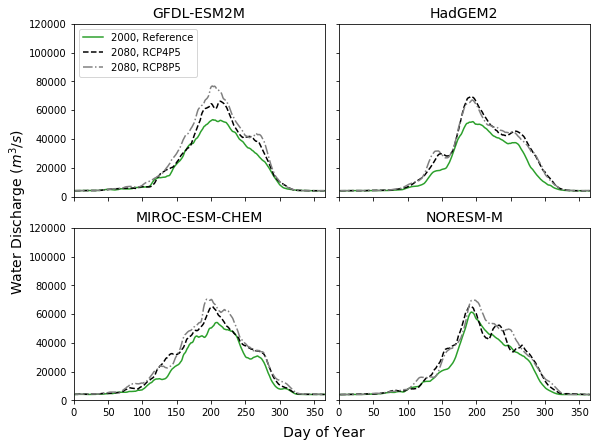

In [31]:
day_of_year = np.arange(1,366,1)

fig, axs = plt.subplots(2,2, sharex = True, sharey = True, figsize = (8,6))
axs[0,0].plot(day_of_year, gfdl_mean_cols_qw, color = 'tab:green', linestyle = 'solid', label = '2000, Reference')
axs[0,0].plot(day_of_year, gfdl_cols_qw_80_4p5, color = 'black', linestyle = 'dashed', label = '2080, RCP4P5')
axs[0,0].plot(day_of_year, gfdl_cols_qw_80_8p5, color = 'grey', linestyle = 'dashdot', label = '2080, RCP8P5')
axs[0,0].set_title('GFDL-ESM2M', size = 14)
axs[0,1].plot(day_of_year, hadgem_mean_cols_qw, color = 'tab:green', linestyle = 'solid')
axs[0,1].plot(day_of_year, hadgem_cols_qw_80_4p5, color = 'black', linestyle = 'dashed')
axs[0,1].plot(day_of_year, hadgem_cols_qw_80_8p5, color = 'grey', linestyle = 'dashdot')
axs[0,1].set_title('HadGEM2', size = 14)
axs[1,0].plot(day_of_year, miroc_mean_cols_qw, color = 'tab:green', linestyle = 'solid')
axs[1,0].plot(day_of_year, miroc_cols_qw_80_4p5, color = 'black', linestyle = 'dashed')
axs[1,0].plot(day_of_year, miroc_cols_qw_80_8p5, color = 'grey', linestyle = 'dashdot')
axs[1,0].set_title('MIROC-ESM-CHEM', size = 14)
axs[1,1].plot(day_of_year, noresm_mean_cols_qw, color = 'tab:green', linestyle = 'solid')
axs[1,1].plot(day_of_year, noresm_cols_qw_80_4p5, color = 'black', linestyle = 'dashed')
axs[1,1].plot(day_of_year, noresm_cols_qw_80_8p5, color = 'grey', linestyle = 'dashdot')
axs[1,1].set_title('NORESM-M', size = 14)
plt.tight_layout()
axs[0,0].legend(loc = 'upper left')
axs[0,0].set_ylim([0,120000])
axs[0,0].set_xlim([0,365])
fig.text(0.52, -0.02, 'Day of Year', ha='center', size = 14)
fig.text(-.03, 0.5, 'Water Discharge ($m^3/s$)', va='center', rotation='vertical', size = 14)
plt.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v2/projections/brahmaputra_qw_peakqw_thrutime.png', dpi = 300)
plt.show()

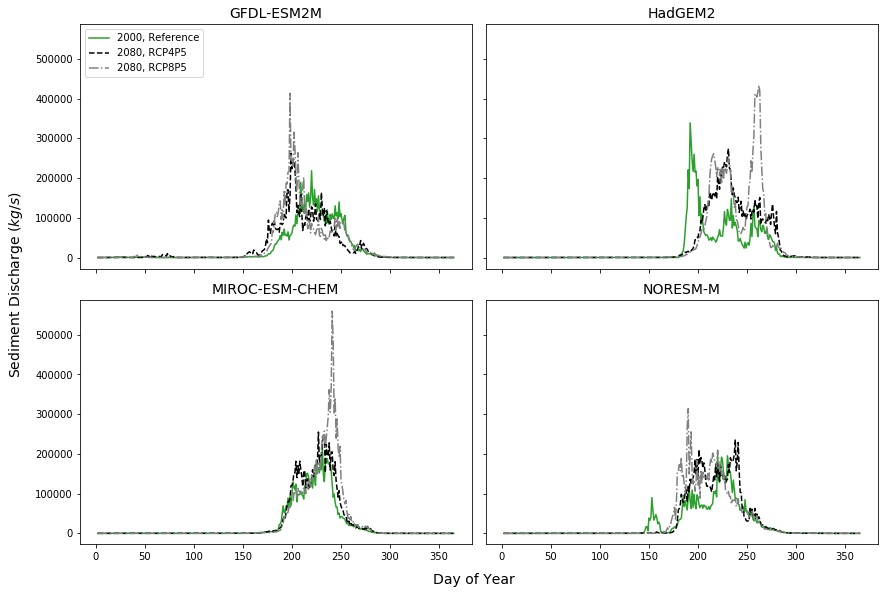

In [32]:
day_of_year = np.arange(1,366,1)

fig, axs = plt.subplots(2,2, sharex = True, sharey = True, figsize = (12,8))
axs[0,0].plot(day_of_year, gfdl_mean_cols_qs, color = 'tab:green', linestyle = 'solid', label = '2000, Reference')
axs[0,0].plot(day_of_year, gfdl_cols_qs_80_4p5, color = 'black', linestyle = 'dashed', label = '2080, RCP4P5')
axs[0,0].plot(day_of_year, gfdl_cols_qs_80_8p5, color = 'grey', linestyle = 'dashdot', label = '2080, RCP8P5')
axs[0,0].set_title('GFDL-ESM2M', size = 14)
axs[0,1].plot(day_of_year, hadgem_mean_cols_qs, color = 'tab:green', linestyle = 'solid')
axs[0,1].plot(day_of_year, hadgem_cols_qs_80_4p5, color = 'black', linestyle = 'dashed')
axs[0,1].plot(day_of_year, hadgem_cols_qs_80_8p5, color = 'grey', linestyle = 'dashdot')
axs[0,1].set_title('HadGEM2', size = 14)
axs[1,0].plot(day_of_year, miroc_mean_cols_qs, color = 'tab:green', linestyle = 'solid')
axs[1,0].plot(day_of_year, miroc_cols_qs_80_4p5, color = 'black', linestyle = 'dashed')
axs[1,0].plot(day_of_year, miroc_cols_qs_80_8p5, color = 'grey', linestyle = 'dashdot')
axs[1,0].set_title('MIROC-ESM-CHEM', size = 14)
axs[1,1].plot(day_of_year, noresm_mean_cols_qs, color = 'tab:green', linestyle = 'solid')
axs[1,1].plot(day_of_year, noresm_cols_qs_80_4p5, color = 'black', linestyle = 'dashed')
axs[1,1].plot(day_of_year, noresm_cols_qs_80_8p5, color = 'grey', linestyle = 'dashdot')
axs[1,1].set_title('NORESM-M', size = 14)
plt.tight_layout()
axs[0,0].legend(loc = 'upper left')
fig.text(0.52, -0.02, 'Day of Year', ha='center', size = 14)
fig.text(-.02, 0.5, 'Sediment Discharge ($kg/s$)', va='center', rotation='vertical', size = 14)
plt.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v2/projections/brahmaputra_qw_peakqs_thrutime.png', dpi = 300)
plt.show()